In [3]:
! pip install autoviz

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [13]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")
sec_inputs = np.load ("../../initial_data2/function_5/initial_inputs.npy")
sec_outputs = np.load ("../../initial_data2/function_5/initial_outputs.npy")

In [7]:
orig_inputs = np.array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
        [0.75865295, 0.53651774, 0.65600038, 0.36034155],
        [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
        [0.70605083, 0.53419196, 0.26424335, 0.48208755],
        [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
        [0.68343225, 0.11866264, 0.82904591, 0.56757661],
        [0.55362148, 0.66734998, 0.32380582, 0.81486975],
        [0.35235627, 0.32224153, 0.11697937, 0.47311252],
        [0.15378571, 0.72938169, 0.42259844, 0.44307417],
        [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
        [0.67749115, 0.35850951, 0.47959222, 0.07288048],
        [0.58397341, 0.14724265, 0.34809746, 0.42861465],
        [0.30688872, 0.31687813, 0.62263448, 0.09539906],
        [0.51114177, 0.817957  , 0.72871042, 0.11235362],
        [0.43893338, 0.77409176, 0.37816709, 0.93369621],
        [0.22418902, 0.84648049, 0.87948418, 0.87851568],
        [0.72526172, 0.47987049, 0.08894684, 0.75976022],
        [0.35548161, 0.63961937, 0.41761768, 0.12260384],
        [0.11987923, 0.86254031, 0.64333133, 0.84980383],
        [0.12688467, 0.15342962, 0.77016219, 0.19051811],
        [0.94478251, 0.83050925, 0.83227839, 0.20292205],
        [0.05244809, 0.43614877, 0.37845743, 0.18802639],
        [0.06304804, 0.86636135, 0.85864857, 0.2085756 ],
        [0.98882078, 0.66382651, 0.36648076, 0.99624833],
        [0.7633217 , 0.62834667, 0.78222976, 0.81919558],
        [0.14275584, 0.20216247, 0.93864415, 0.22320333],
        [0.17997633, 0.81948394, 0.36434617, 0.88796618],
        [0.51645398, 0.39496365, 0.95182759, 0.69880194],
        [0.26844685, 0.49315648, 0.00685878, 0.76232741],
        [0.3981843 , 0.88166606, 0.1166999 , 0.84462821],
        [0.30584223, 0.93636618, 0.95401692, 0.88360492],
        [0.17995479, 0.69481431, 0.78705686, 0.11803764],
        [0.49675268, 0.42376709, 0.68348299, 0.30627614],
        [0.42326139, 0.53827668, 0.6836236 , 0.40884354],
        [0.63954186, 0.99740866, 0.35346561, 0.64339858],
        [0.93742409, 0.03577705, 0.63450862, 0.22699177],
        [0.46963177, 0.44637345, 0.04460442, 0.08712024],
        [0.544687  , 0.95335541, 0.32346906, 0.61262944],
        [0.20733069, 0.31091806, 0.6947729 , 0.11411475],
        [0.37937978, 0.79168224, 0.22186303, 0.0050104 ]])

In [15]:
orig_inputs

array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937,

In [17]:
# Add the new data points
new_data = np.array([[0.191447, 0.038193, 0.607418, 0.414584], 
                     [0.45414 , 0.862622, 0.888966, 0.898446],
                     [0.26, 0.25, 0.55, 0.66667],
                     [0.6 , 0.86, 0.88, 0.77],
                     [0.439482, 0.600165, 0.886068, 0.879015],
                     [0.444441, 0.408194, 0.881999, 0.860646],
                     [0.617872, 0.434632, 0.864567, 0.894463],
                     [0.283936, 0.655111, 0.374069, 0.162759]])
#inputs = np.vstack([orig_inputs, new_data])
inputs = np.vstack([orig_inputs, sec_inputs, new_data])

len(orig_inputs), len(inputs)

(20, 48)

In [19]:
inputs

array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937,

In [61]:
orig_outputs = np.array([[6.44434399e+01], [1.83013796e+01], [1.12939795e-01], [4.21089813e+00],
        [2.58370525e+02], [7.84343889e+01], [5.75715369e+01], [1.09571876e+02],
        [8.84799176e+00], [2.33223610e+02], [2.44230883e+01], [6.44201468e+01],
        [6.34767158e+01], [7.97291299e+01], [3.55806818e+02], [1.08885962e+03],
        [2.88667516e+01], [4.51815703e+01], [4.31612757e+02], [9.97233189e+00],
        [1.16473297e+03], [1.21188493e+02], [2.87522281e+02], [1.98066524e+03],
        [5.28521436e+02], [6.59070325e+01], [2.73993040e+02], [3.34964253e+02],
        [3.03509422e+00], [3.16811442e+02], [2.13695298e+03], [1.63923940e+01],
        [1.47198474e+01], [7.44697895e+00], [5.40487146e+02], [1.52854400e+02],
        [1.03383108e+02], [2.53166057e+02], [3.59261876e+01], [2.10925883e+00]])

In [63]:
outputs = np.array([[6.44434399e+01], [1.83013796e+01], [1.12939795e-01], [4.21089813e+00],
        [2.58370525e+02], [7.84343889e+01], [5.75715369e+01], [1.09571876e+02],
        [8.84799176e+00], [2.33223610e+02], [2.44230883e+01], [6.44201468e+01],
        [6.34767158e+01], [7.97291299e+01], [3.55806818e+02], [1.08885962e+03],
        [2.88667516e+01], [4.51815703e+01], [4.31612757e+02], [9.97233189e+00],
        [1.16473297e+03], [1.21188493e+02], [2.87522281e+02], [1.98066524e+03],
        [5.28521436e+02], [6.59070325e+01], [2.73993040e+02], [3.34964253e+02],
        [3.03509422e+00], [3.16811442e+02], [2.13695298e+03], [1.63923940e+01],
        [1.47198474e+01], [7.44697895e+00], [5.40487146e+02], [1.52854400e+02],
        [1.03383108e+02], [2.53166057e+02], [3.59261876e+01], [2.10925883e+00],
        [64.44338580660717], [1394.3991380385442], [19.94076184836832], [962.5372908769349],
        [593.293286672886], [402.4379991402934], [593.4166197557187], [46.70474281611019]])

In [23]:
orig_outputs, sec_outputs

(array([6.44434399e+01, 1.83013796e+01, 1.12939795e-01, 4.21089813e+00,
        2.58370525e+02, 7.84343889e+01, 5.75715369e+01, 1.09571876e+02,
        8.84799176e+00, 2.33223610e+02, 2.44230883e+01, 6.44201468e+01,
        6.34767158e+01, 7.97291299e+01, 3.55806818e+02, 1.08885962e+03,
        2.88667516e+01, 4.51815703e+01, 4.31612757e+02, 9.97233189e+00]),
 array([1.16473297e+03, 1.21188493e+02, 2.87522281e+02, 1.98066524e+03,
        5.28521436e+02, 6.59070325e+01, 2.73993040e+02, 3.34964253e+02,
        3.03509422e+00, 3.16811442e+02, 2.13695298e+03, 1.63923940e+01,
        1.47198474e+01, 7.44697895e+00, 5.40487146e+02, 1.52854400e+02,
        1.03383108e+02, 2.53166057e+02, 3.59261876e+01, 2.10925883e+00]))

In [31]:
outputs = np.append(orig_outputs, sec_outputs)
#outputs = orig_outputs
outputs = np.append(outputs, 64.44338580660717)
outputs = np.append(outputs, 1394.3991380385442)
outputs = np.append(outputs, 19.94076184836832)
outputs = np.append(outputs, 962.5372908769349)
outputs = np.append(outputs, 593.293286672886)
outputs = np.append(outputs, 402.4379991402934)
outputs = np.append(outputs, 593.4166197557187)
outputs = np.append(outputs, 46.70474281611019)
len(outputs)

48

In [33]:
outputs

array([6.44434399e+01, 1.83013796e+01, 1.12939795e-01, 4.21089813e+00,
       2.58370525e+02, 7.84343889e+01, 5.75715369e+01, 1.09571876e+02,
       8.84799176e+00, 2.33223610e+02, 2.44230883e+01, 6.44201468e+01,
       6.34767158e+01, 7.97291299e+01, 3.55806818e+02, 1.08885962e+03,
       2.88667516e+01, 4.51815703e+01, 4.31612757e+02, 9.97233189e+00,
       1.16473297e+03, 1.21188493e+02, 2.87522281e+02, 1.98066524e+03,
       5.28521436e+02, 6.59070325e+01, 2.73993040e+02, 3.34964253e+02,
       3.03509422e+00, 3.16811442e+02, 2.13695298e+03, 1.63923940e+01,
       1.47198474e+01, 7.44697895e+00, 5.40487146e+02, 1.52854400e+02,
       1.03383108e+02, 2.53166057e+02, 3.59261876e+01, 2.10925883e+00,
       6.44433858e+01, 1.39439914e+03, 1.99407618e+01, 9.62537291e+02,
       5.93293287e+02, 4.02437999e+02, 5.93416620e+02, 4.67047428e+01])

In [27]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,feature3,feature4,target
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


In [35]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,target
0,0.191447,0.038193,0.607418,0.414584,64.443440
1,0.758653,0.536518,0.656000,0.360342,18.301380
2,0.438350,0.804340,0.210245,0.151295,0.112940
3,0.706051,0.534192,0.264243,0.482088,4.210898
4,0.836478,0.193610,0.663893,0.785649,258.370525
5,0.683432,0.118663,0.829046,0.567577,78.434389
6,0.553621,0.667350,0.323806,0.814870,57.571537
7,0.352356,0.322242,0.116979,0.473113,109.571876
8,0.153786,0.729382,0.422598,0.443074,8.847992
9,0.463442,0.630025,0.107906,0.957644,233.223610


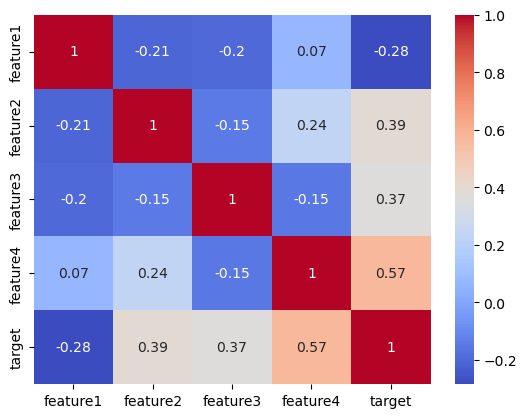

In [37]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

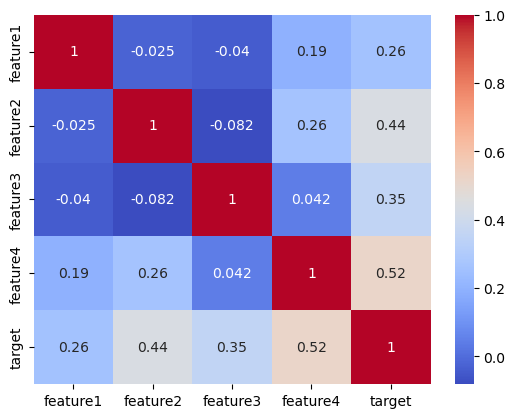

In [39]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  48 non-null     float64
 1   feature2  48 non-null     float64
 2   feature3  48 non-null     float64
 3   feature4  48 non-null     float64
 4   target    48 non-null     float64
dtypes: float64(5)
memory usage: 2.0 KB


In [43]:
orig_df.describe()

,feature1,feature2,feature3,feature4,target
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.460387,0.498557,0.477944,0.494719,151.271876
std,0.227206,0.273619,0.246797,0.308458,251.955640
min,0.119879,0.038193,0.088947,0.072880,0.112940
25%,0.286214,0.286061,0.308915,0.180712,22.892661
50%,0.451188,0.535355,0.451095,0.458093,63.948431
75%,0.678976,0.740559,0.657973,0.792954,140.484809
max,0.836478,0.862540,0.879484,0.957644,1088.859618


In [45]:
df.describe()

,feature1,feature2,feature3,feature4,target
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.445856,0.550529,0.551444,0.514143,321.737300
std,0.242124,0.274823,0.280544,0.315975,491.323778
min,0.052448,0.035777,0.006859,0.005010,0.112940
25%,0.251047,0.349443,0.352124,0.199821,27.755836
50%,0.439208,0.569221,0.615026,0.477600,91.556119
75%,0.604468,0.807744,0.797554,0.825554,367.464613
max,0.988821,0.997409,0.954017,0.996248,2136.952984


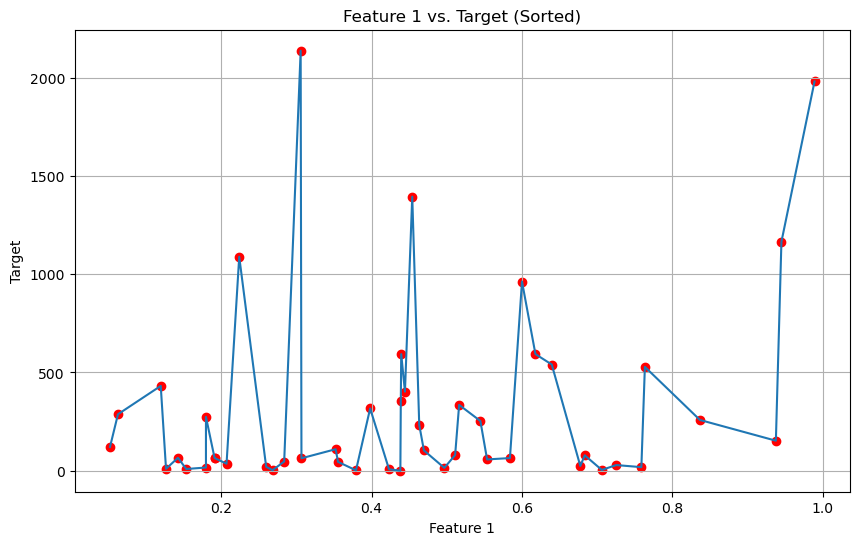

In [47]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

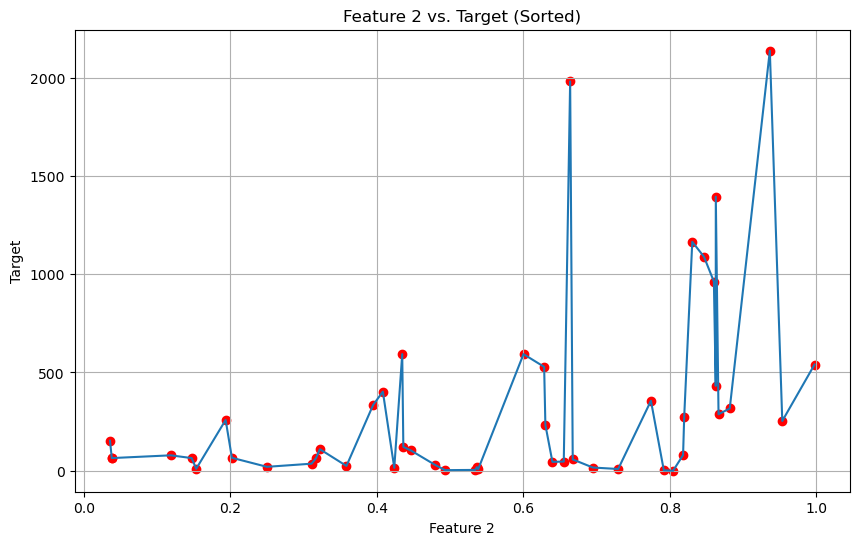

In [49]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

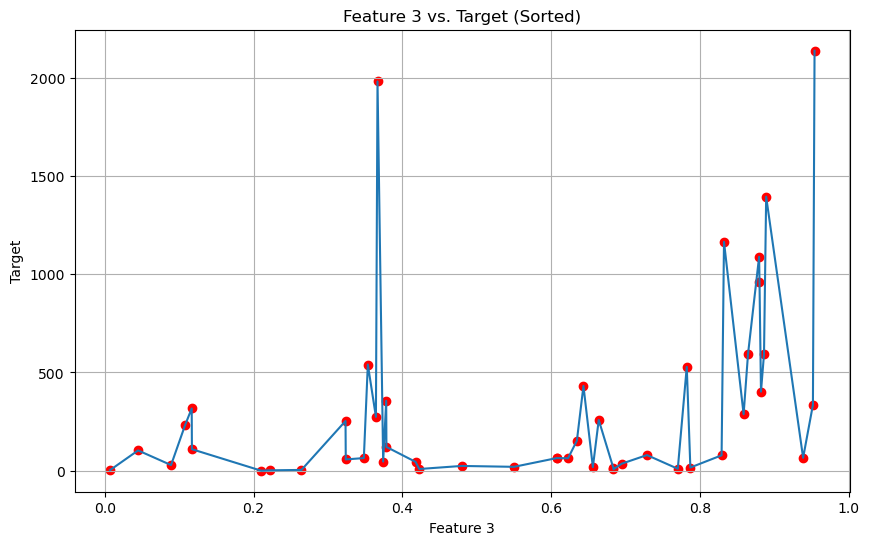

In [51]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

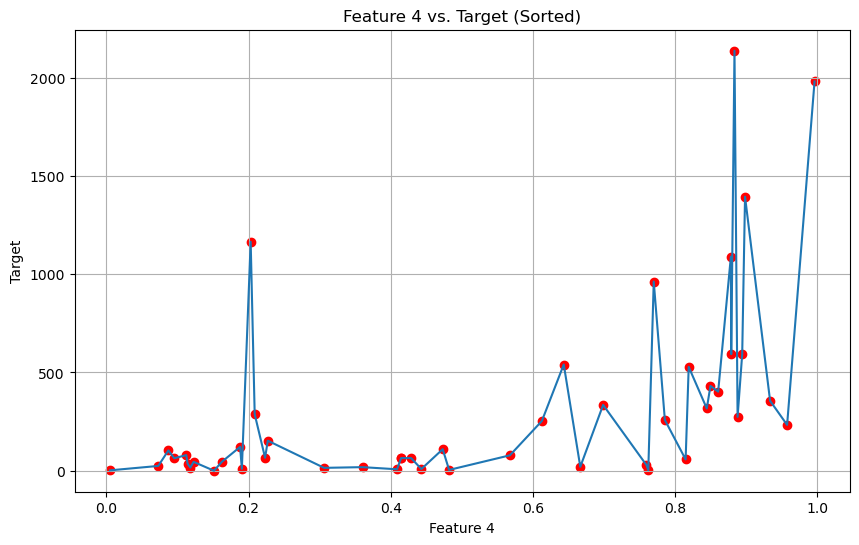

In [53]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [55]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10, 15, 20],
#    'normalize_y': [True],
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

Best parameters: {'alpha': 0.01, 'kernel': 3.16**2 * RBF(length_scale=10), 'n_restarts_optimizer': 10, 'normalize_y': True}
Best score: -123267.93220524564


GaussianProcessRegressor(alpha=0.01, kernel=3.16**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=True)

In [57]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=0.01, kernel=3.16**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


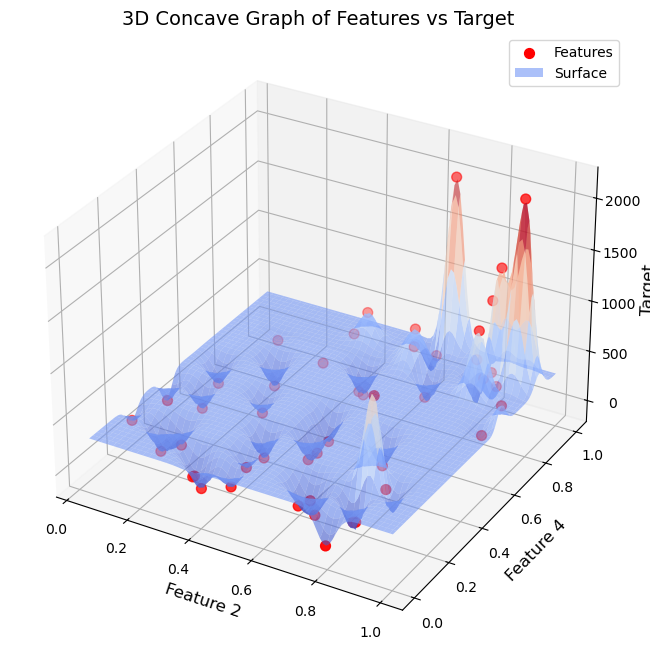

In [59]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature2'], df['feature4'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature2'].min(), df['feature2'].max(), 100),
                   np.linspace(df['feature4'].min(), df['feature4'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature2', 'feature4']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 2', fontsize=12)
ax.set_ylabel('Feature 4', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


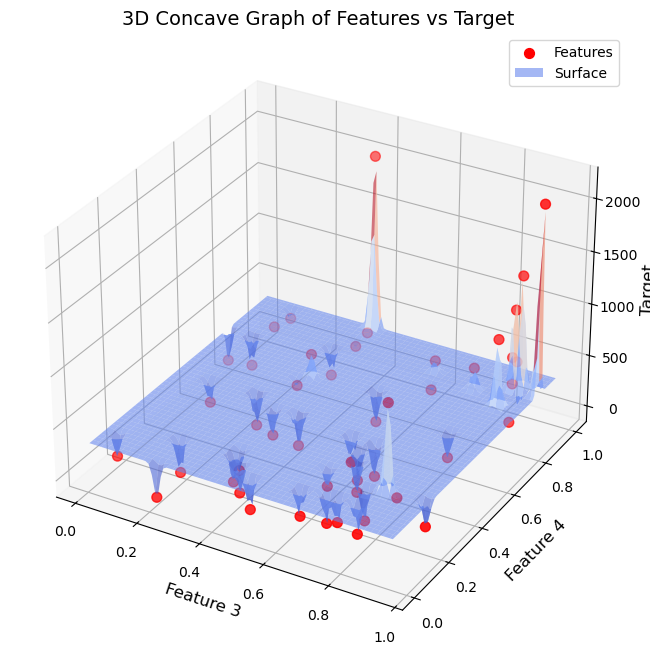

In [61]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature3'], df['feature4'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature3'].min(), df['feature3'].max(), 100),
                   np.linspace(df['feature4'].min(), df['feature4'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature3', 'feature4']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 3', fontsize=12)
ax.set_ylabel('Feature 4', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

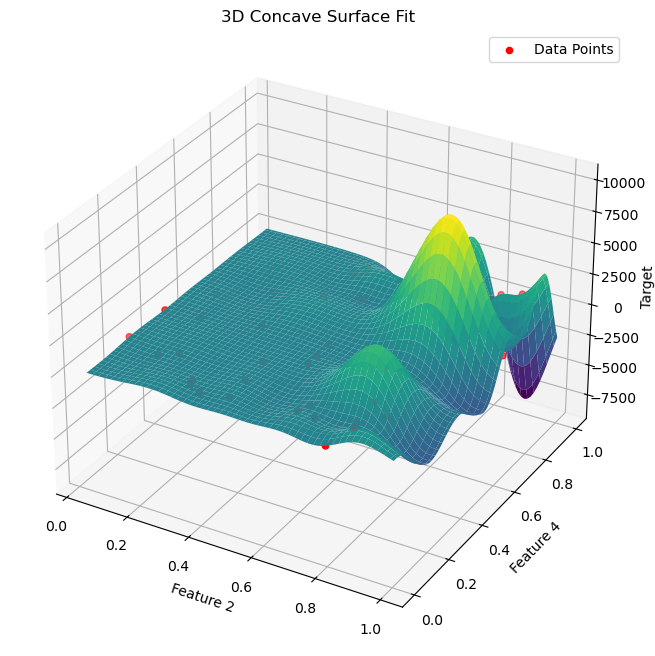

In [63]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature2']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

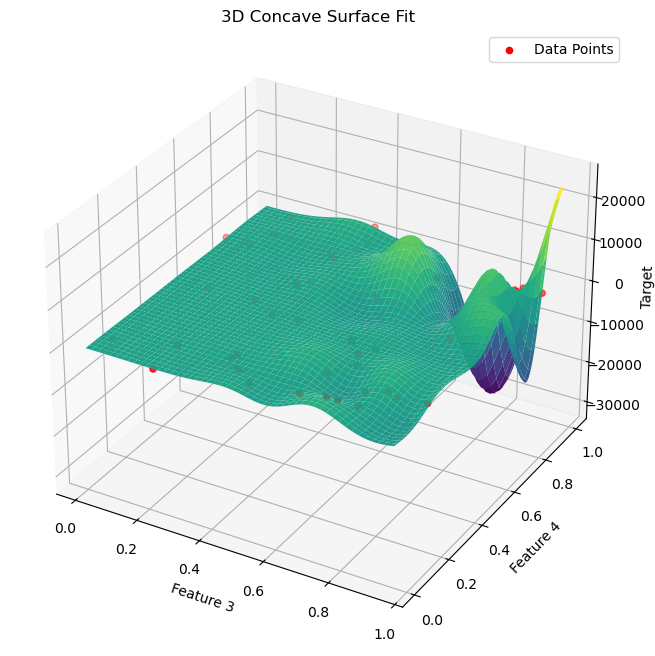

In [65]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature3']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 3')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

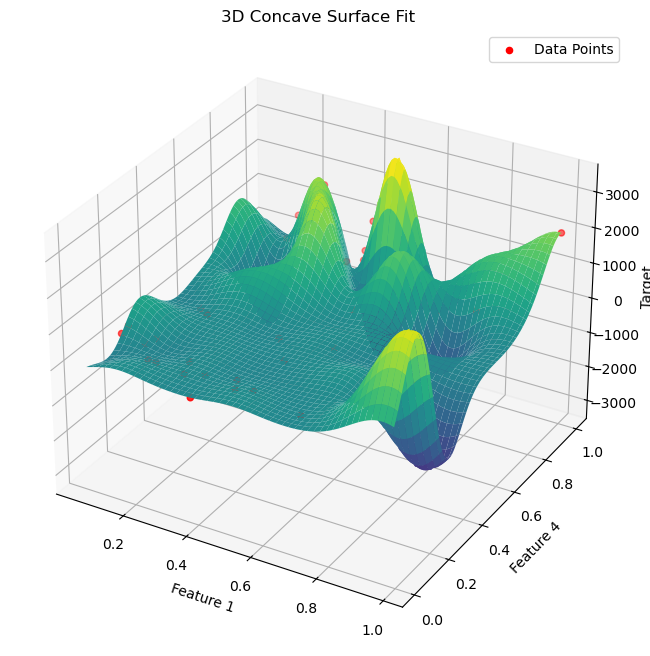

In [67]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


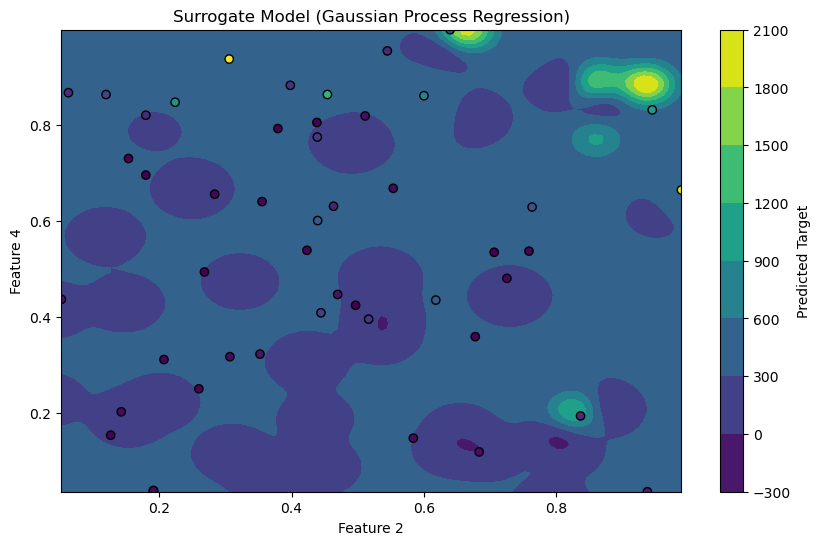

In [69]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature2', 'feature4']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


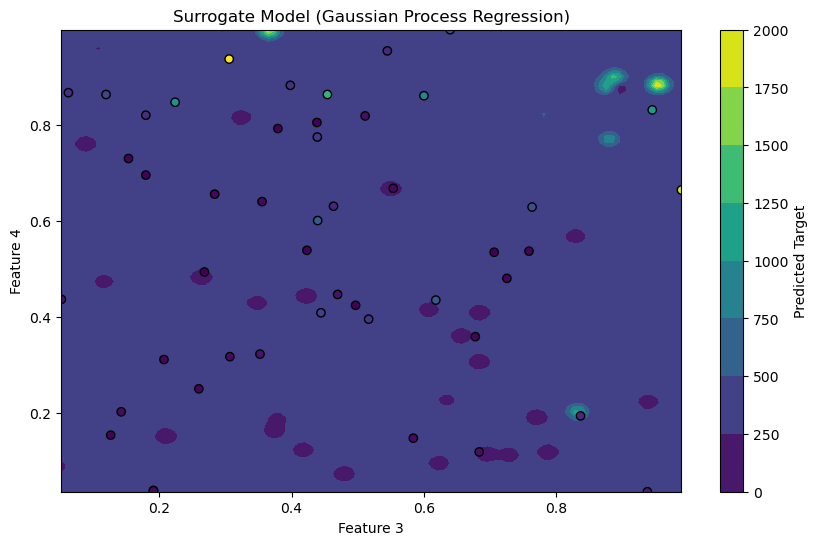

In [71]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature3', 'feature4']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


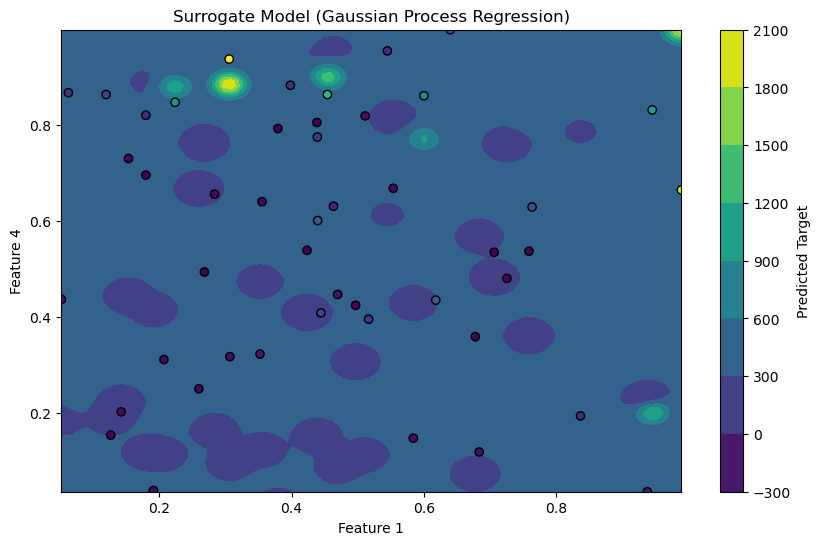

In [73]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature4']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 4')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


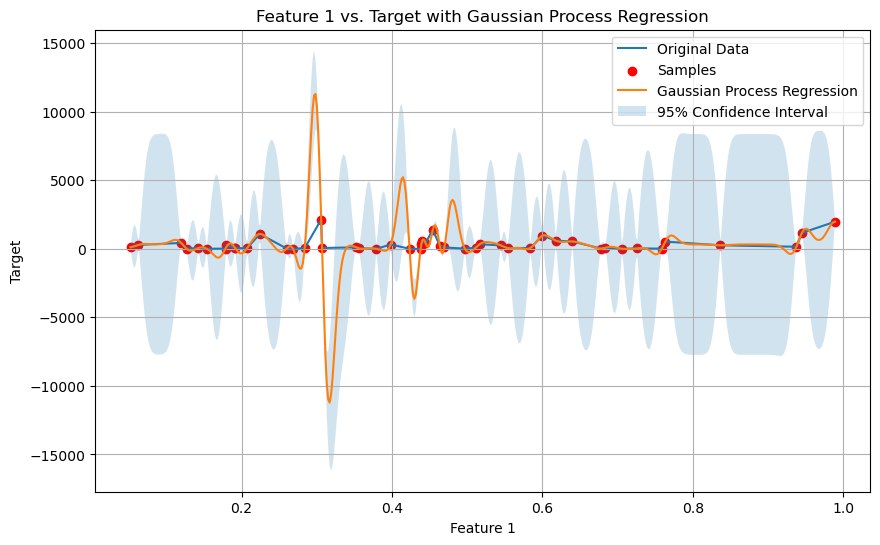

8.45**2 * RBF(length_scale=0.01)


In [75]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
#  Consider using a combination of kernels for a more flexible fit
#kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1) # Example combined kernel

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)


# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


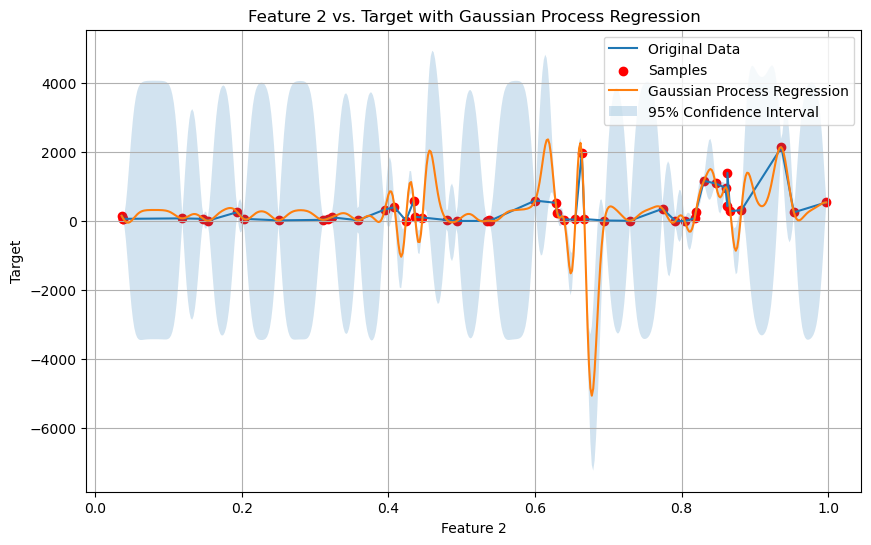

3.93**2 * RBF(length_scale=0.01)


In [77]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
#  Consider using a combination of kernels for a more flexible fit
#kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1) # Example combined kernel


# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


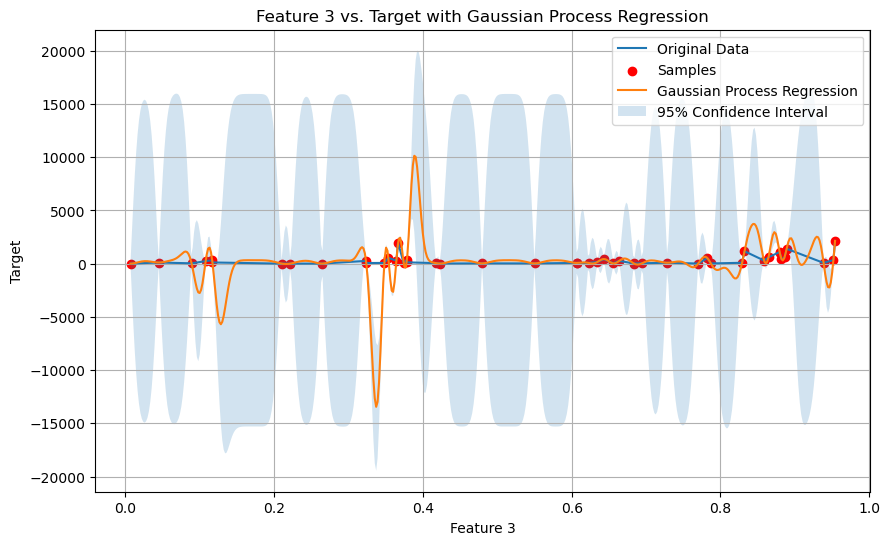

16.4**2 * RBF(length_scale=0.01)


In [79]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature3' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
#  Consider using a combination of kernels for a more flexible fit
#kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1) # Example combined kernel

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


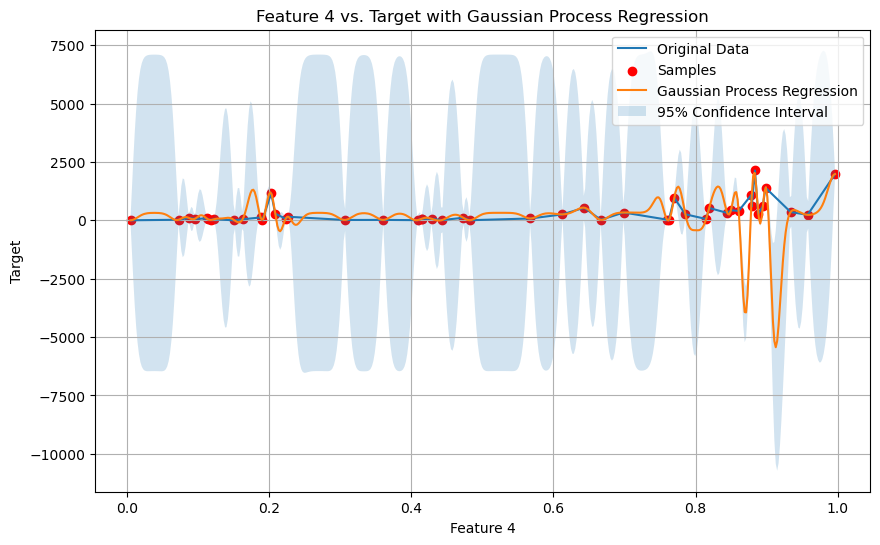

7.11**2 * RBF(length_scale=0.01)


In [81]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature4']].values  # Use only 'feature4' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
#kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1) # Example combined kernel

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


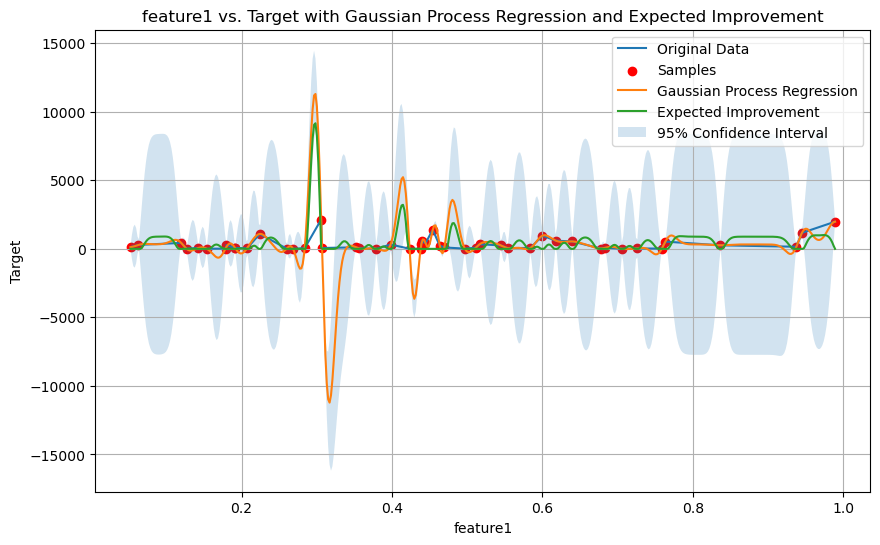

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


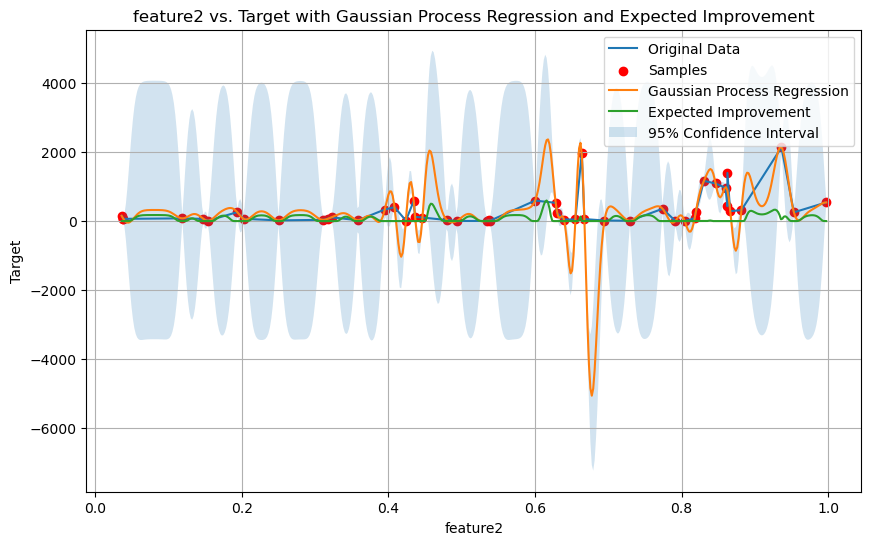

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


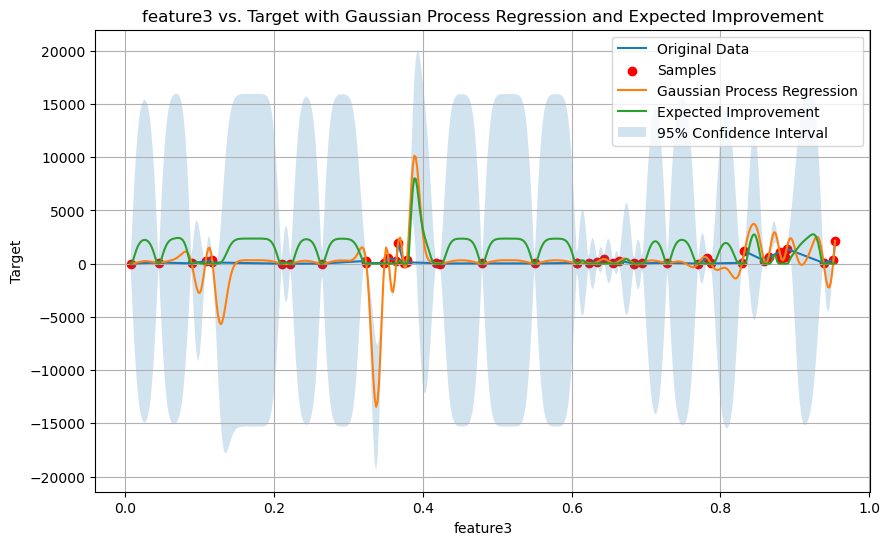

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


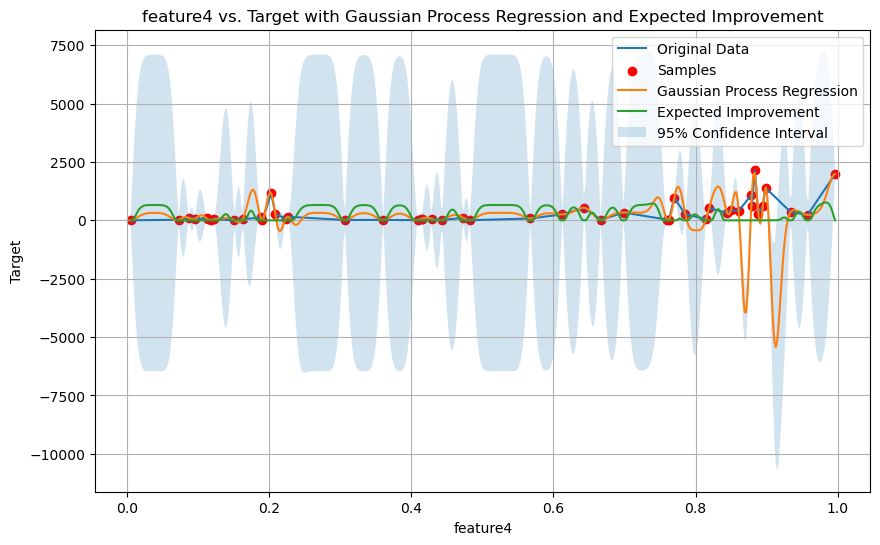

7.11**2 * RBF(length_scale=0.01)

In [83]:
from scipy.stats import norm # Import the norm object from scipy.stats

# Assuming df is already defined as in your provided code

for feature in ['feature1', 'feature2', 'feature3', 'feature4']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Expected Improvement
    y_best = np.max(y)  # Current best observed target value
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ei, label='Expected Improvement') #Plot EI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Expected Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


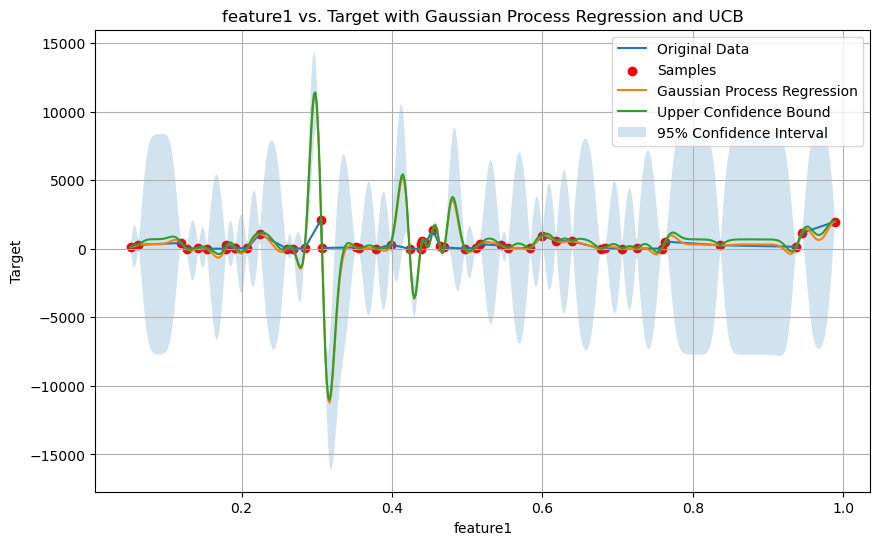

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


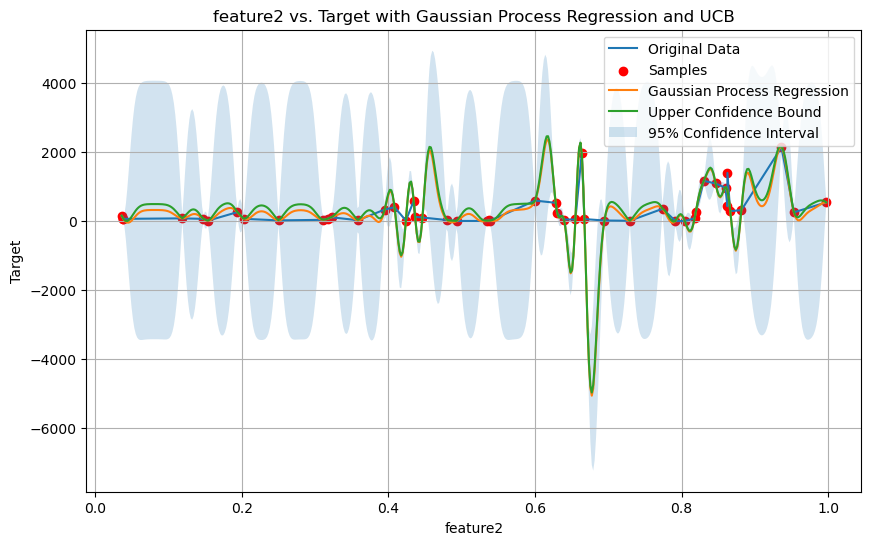

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


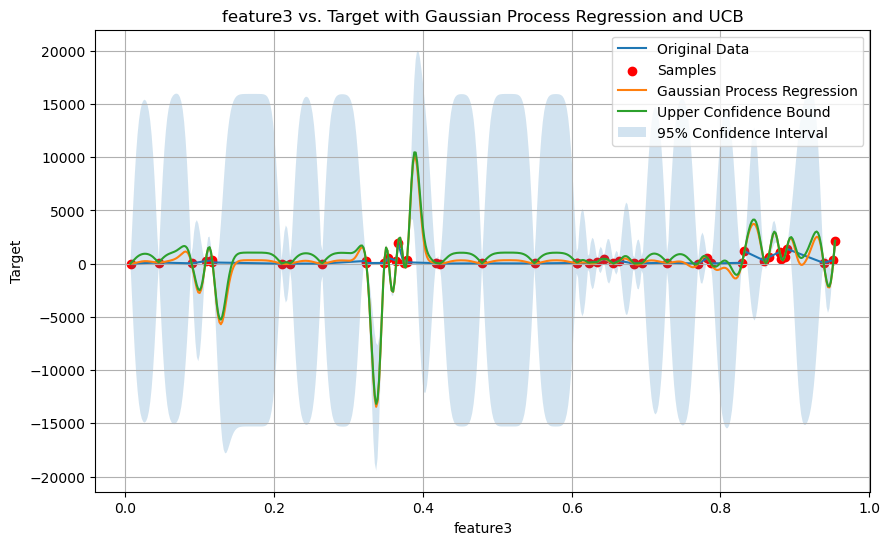

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


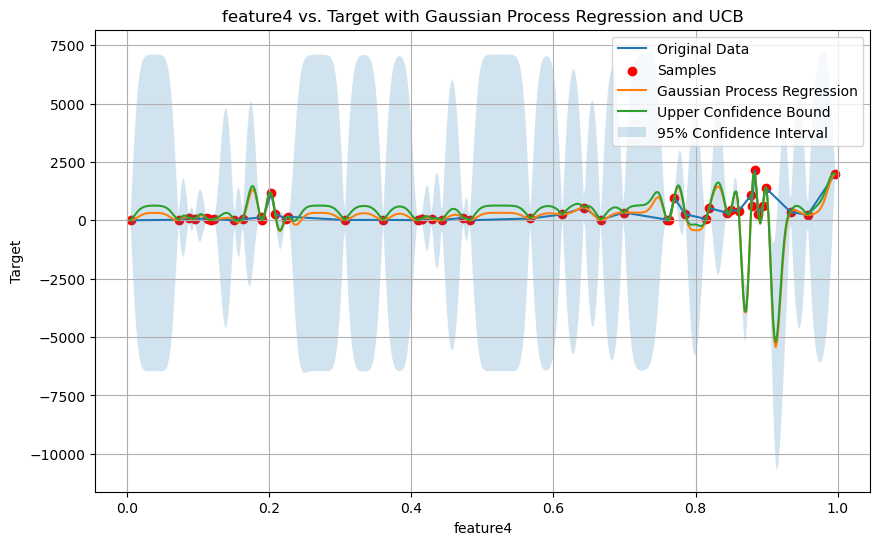

7.11**2 * RBF(length_scale=0.01)

In [85]:
# Assuming df is already defined as in your provided code

for feature in ['feature1', 'feature2', 'feature3', 'feature4']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Upper Confidence Bound (UCB)
    delta = 0.1  # You can adjust this parameter
    ucb = y_pred + np.sqrt(delta * np.log(len(X)) / len(X)) * sigma


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ucb, label='Upper Confidence Bound') # Plot UCB
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


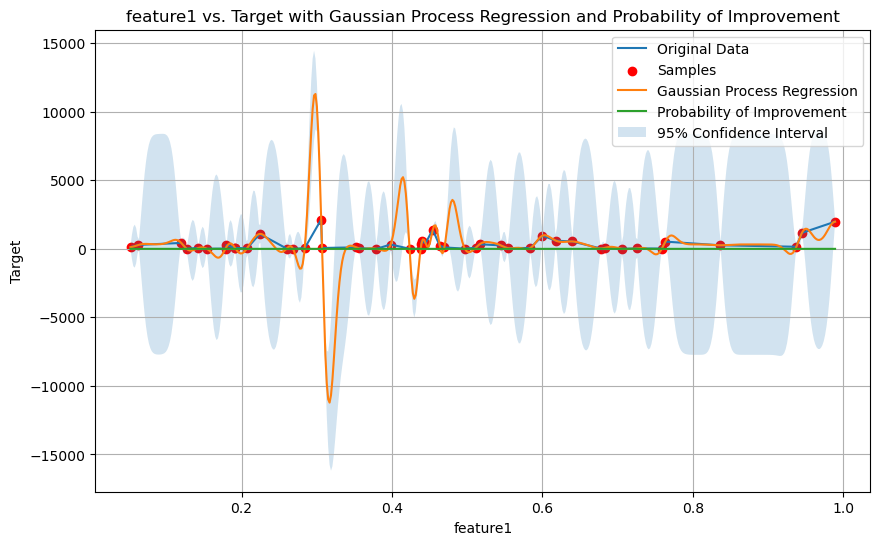

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


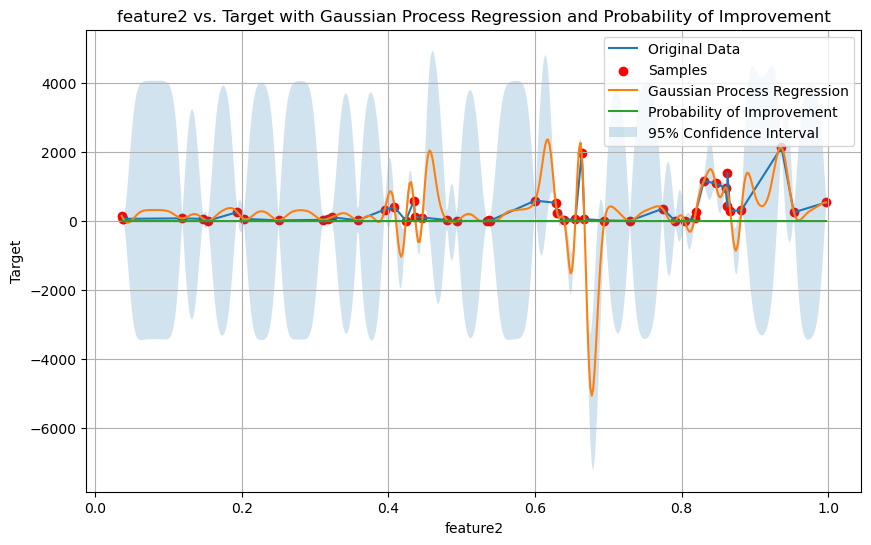

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


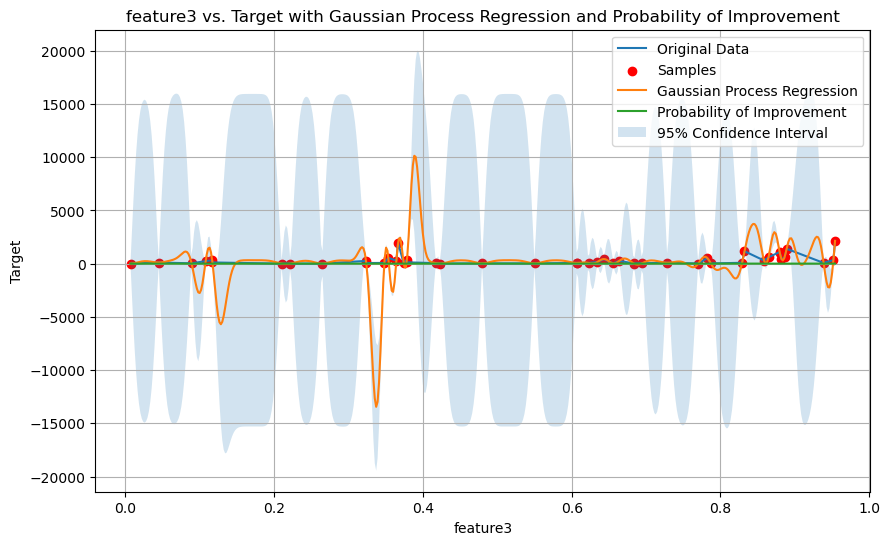

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


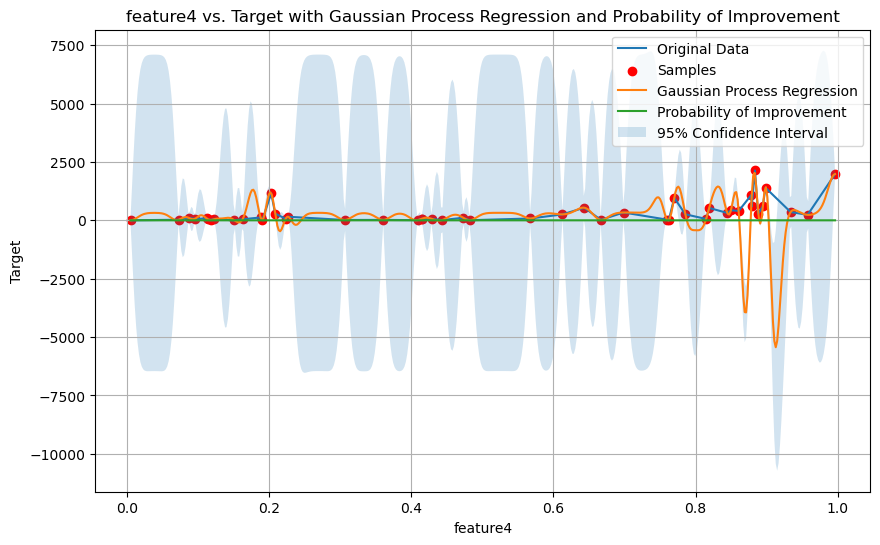

In [87]:
# 
for feature in ['feature1', 'feature2', 'feature3', 'feature4']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (PI)
    y_best = np.max(y)  # Current best observed target value
    pi = norm.cdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement') #Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Probability of Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

In [89]:
best_feature_values = {}

for feature in ['feature1', 'feature2', 'feature3', 'feature4']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    y_best = np.max(y)
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    max_ei_index = np.argmax(ei)

    best_feature_values[feature] = f"{X_pred[max_ei_index][0]:.6f}"

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()), dtype=np.float64)

print(best_feature_values)
new_data_array

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


{'feature1': '0.298269', 'feature2': '0.615839', 'feature3': '0.388379', 'feature4': '0.982343'}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


array([0.298269, 0.615839, 0.388379, 0.982343])

In [91]:
inputs

array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937,

In [93]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=4)

print("New Input Data (with noise):", new_input_data)
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.30741787 0.61074364 0.38339433 0.97671825]
New Input Data (with noise): [0.307418, 0.610744, 0.383394, 0.976718]


In [95]:
# Add the new data points
next_inputs = np.vstack([inputs, new_input_data])

len(next_inputs), len(inputs)

(49, 48)

In [97]:
next_inputs

array([[0.19144708, 0.03819337, 0.60741781, 0.41458414],
       [0.75865295, 0.53651774, 0.65600038, 0.36034155],
       [0.43834987, 0.8043397 , 0.21024527, 0.15129482],
       [0.70605083, 0.53419196, 0.26424335, 0.48208755],
       [0.83647799, 0.19360965, 0.6638927 , 0.78564888],
       [0.68343225, 0.11866264, 0.82904591, 0.56757661],
       [0.55362148, 0.66734998, 0.32380582, 0.81486975],
       [0.35235627, 0.32224153, 0.11697937, 0.47311252],
       [0.15378571, 0.72938169, 0.42259844, 0.44307417],
       [0.46344227, 0.63002451, 0.10790646, 0.9576439 ],
       [0.67749115, 0.35850951, 0.47959222, 0.07288048],
       [0.58397341, 0.14724265, 0.34809746, 0.42861465],
       [0.30688872, 0.31687813, 0.62263448, 0.09539906],
       [0.51114177, 0.817957  , 0.72871042, 0.11235362],
       [0.43893338, 0.77409176, 0.37816709, 0.93369621],
       [0.22418902, 0.84648049, 0.87948418, 0.87851568],
       [0.72526172, 0.47987049, 0.08894684, 0.75976022],
       [0.35548161, 0.63961937,

In [99]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
             'feature3': next_inputs[:,2],
             'feature4': next_inputs[:,3],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2,feature3,feature4
0,0.191447,0.038193,0.607418,0.414584
1,0.758653,0.536518,0.656000,0.360342
2,0.438350,0.804340,0.210245,0.151295
3,0.706051,0.534192,0.264243,0.482088
4,0.836478,0.193610,0.663893,0.785649
5,0.683432,0.118663,0.829046,0.567577
6,0.553621,0.667350,0.323806,0.814870
7,0.352356,0.322242,0.116979,0.473113
8,0.153786,0.729382,0.422598,0.443074
9,0.463442,0.630025,0.107906,0.957644


In [143]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.316078, 0.612661, 0.377225, 0.984955]


In [95]:
new_input_data = [0.6, 0.86, 0.88, 0.77]

In [101]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")

Feature 1 at peak of target: 0.30584223457521975
Feature 2 at peak of target: 0.9363661811043745
Feature 3 at peak of target: 0.954016918680242
Feature 4 at peak of target: 0.88360492369892


In [103]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")

Feature 1 at peak of target: 0.43834987265310876
Feature 2 at peak of target: 0.8043397048222797
Feature 3 at peak of target: 0.21024526639869967
Feature 4 at peak of target: 0.15129481609432094


In [105]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.307418, 0.610744, 0.383394, 0.976718]
